<a href="https://colab.research.google.com/github/abulzunayed/Machine-Learning_Course_Udemy-A-Z-with-Python_2023-/blob/main/Regression_code/Polynomial_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For polynmial Linear Regeression, we use only Linear Regression, Not Multiple Liner Regression. Look Slide: Linear reg vs Polynomila reg Picture?
# Using polynomial Linaer regression, we can predict any single prediction value on ploted picture or future data.

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ML AtoZ/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
x= df.iloc[:, 1:-1].values #  Here we take only Level column and ignore Position column
y= df.iloc[:, -1].values

In [ ]:
x.shape

(10, 1)

In [ ]:
y.shape

(10,)

# Splitting trainand test data set:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=1)

***In this time, we will not do split train and Test Data, because we want to predict a single value(future prediction) against to whole dataset. ***
However we need it to perform the Model Evaluating:

Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

Training Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=4)   #  max degree(4) depend on the polynomial degree of n,ex:P_re= b0+b1X1+b2X2(n=2)+....+bnXn.(n=n) which found from our expected prediction position
x_poly= poly_reg.fit_transform(x)
lin_reg_2= LinearRegression()
lin_reg_2.fit(x_poly,y)

LinearRegression()

Visualising the linear Regression results

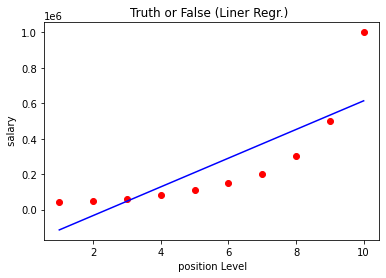

In [ ]:
plt.scatter(x, y, color='red')
plt.plot( x, lin_reg.predict(x), color='blue')
plt.title('Truth or False (Liner Regr.) ')
plt.xlabel(' position Level')
plt.ylabel(' salary')
plt.show()


Visualising the Polynomial Regression results :

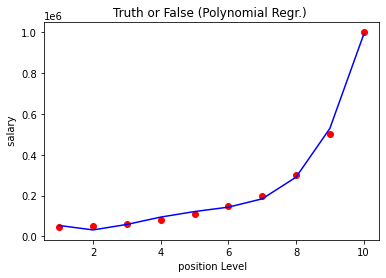

In [ ]:
plt.scatter(x, y, color='red')
plt.plot( x, lin_reg_2.predict(x_poly), color='blue')
plt.title('Truth or False (Polynomial Regr.) ')
plt.xlabel(' position Level')
plt.ylabel(' salary')
plt.show()

Visualising the polynomial Regression results ( for Higher resolution and smoother curve):

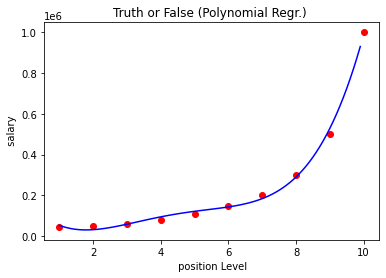

In [ ]:
x_grid= np.arange( min(x), max(x), 0.1)
x_grid= x_grid.reshape( len(x_grid), 1)
plt.scatter(x, y, color='red')
plt.plot( x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid ) ), color='blue')
plt.title('Truth or False (Polynomial Regr.) ')
plt.xlabel(' position Level')
plt.ylabel(' salary')
plt.show()

Predicting a new result with Linear Regression (this is not good prediction). Practically look at your ploted Linear reg picture

In [ ]:
# lin_reg.predict(6.5)  

### Here, we can not use directly predict position value 6.5, because we need to use matrix datatype. How? Ans: use double square bracket.

lin_reg.predict( [ [6.5] ] ) 

## both are same like lin_reg.predict([row, [6.5]]). Here, If we use double square bracket then it shows, 1st bracket for row and 2nd for col.

array([330378.78787879])

Predicting the new Good result using Polynomial Regeression. (this is good prediction). Practically look at your ploted Polynomial Linear picture

In [ ]:
lin_reg_2.predict( poly_reg.fit_transform( [ [6.5] ] ) )

array([158862.45265155])

# Evaluating the Model Performance

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML AtoZ/Data (1).csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Training the Polynomial Regression model on the Training set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

LinearRegression()

Predicting the Test set results:

In [ ]:
y_pred = regressor.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.66 463.28]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9458192606428147

# Quzie question:

1. In our polynomial regression intuition explanation, we wanted to use polynomial because of ....? 
i)Fit,
ii) Ease to use,
iii) Complexity of use,
iv)  None of above
Ans: i)Fit

2. Why is it called polynomial "Linear Regresssion" ?
Ans: It because we are takling about the coeffients in the function, and if the function can be expressed as a linear combination of coeffients

3. Is the plynomial seen as a special case or version of Multiple Linear regression?
Ans: Yes

4. Is polynomial linear regression  a linear model?
Ans:yes

5. When we talk about the class of regression / linaer or non linear) we are talking about__?
i) Charaters
ii) Coefficients
iii) Logs
iv) None of above
Ans:ii) Coefficients